# Support Vector Machine from SKLearn using RBF Kernal
Support Vector Machines are a type of supervised machine learning algorithm that provides analysis of data for classification and regression analysis. While they can be used for regression, SVM is mostly used for classification. We carry out plotting in the n-dimensional space. The value of each feature is also the value of the specified coordinate. Then, we find the ideal hyperplane that differentiates between the two classes.<br>
These support vectors are the coordinate representations of individual observation. It is a frontier method for segregating the two classes.<br>
This machine learning model is able to generalise between two different classes if the set of labelled data is provided in the training set to the algorithm. The main function of the SVM is to check for that hyperplane that is able to distinguish between the two classes.<br>
### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

### Calling Data
Data is call for work. The Columns are selected here is according to the BREAST CANCER DATASET from WINCONSIN Hospital Easily find on Kaggle(www.kaggle.com).<br>
Creating Dataset from original columns from the dataset so that you won't face any trouble regarding the dataset. I use Breast Cancer Dataset to train model and predict whether the person is having cancer or not.

In [2]:
dataset = pd.read_csv('./Dataset/Breast Cancer Dataset/Breast_Cancer_Data.csv')
dataset.drop([dataset.columns[0],dataset.columns[32]],axis=1,inplace=True)
dataset['diagnosis'].replace(['B','M'],[0,1],inplace=True)
X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, 0].values

### Splitting the dataset into the Training set and Test set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting classifier to the Training set

In [5]:
classifier = SVC()
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# ---------------------------------------------------------------------------------------------------------
### Prediction Function
Prediction function is use to predict the accuracy of the classifier model over the train data and test data.

In [6]:
def prediction(model,testing_data,testing_label):
    predict = model.predict(testing_data)
    accuracy = np.count_nonzero(np.equal(predict,testing_label))
    print("Accuracy : ",accuracy*100/testing_label.shape[0])
    return accuracy,predict

#### Testing our Model on the Training Data

In [7]:
train_accuracy,train_predict = prediction(classifier,X_train,y_train)

Accuracy :  90.61032863849765


#### Testing our Model on the Testing Data

In [8]:
test_accuracy,test_predict = prediction(classifier,X_test,y_test)

Accuracy :  89.5104895104895


# ----------------------------------------------------------------------------------------------------------
### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.<br>
##### Precision means how much accurately our model predicts or we can say how much positive idenfied label actually correct.<br>
$$Precision = \frac{True Positive}{True Positive + False Positive}$$
##### Recall means how much positive identified label predicted correctly.<br>
$$Recall = \frac{True Positive}{True Positive + False Negative}$$

In [9]:
def confusion_matrix_with_plot(model,testing_data,testing_label,predict_label):
    tn,fp,fn,tp = confusion_matrix(testing_label,predict_label).ravel()
    plot_confusion_matrix(model,testing_data,testing_label)
    precision = tp/(tp+fp)*100
    recall = tp/(tp+fn)*100
    return print("True Positive : ",tp,"\nFalse Positive : ",fp,"\nTrue Negative : ",tn,"\nFalse Negative : ",fn,"\nPrecision : ",precision,"\nRecall : ",recall)

#### Confusion Matrix over training data

True Positive :  131 
False Positive :  12 
True Negative :  255 
False Negative :  28 
Precision :  91.6083916083916 
Recall :  82.38993710691824


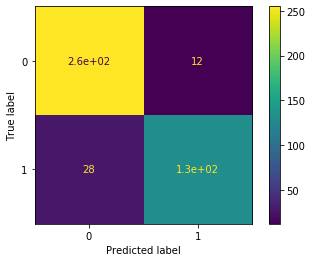

In [10]:
confusion_matrix_with_plot(classifier,X_train,y_train,train_predict)

#### Confusion Matrix over testing data

True Positive :  44 
False Positive :  6 
True Negative :  84 
False Negative :  9 
Precision :  88.0 
Recall :  83.01886792452831


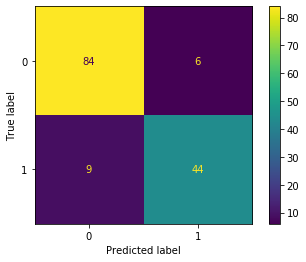

In [11]:
confusion_matrix_with_plot(classifier,X_test,y_test,test_predict)

# ----------------------------------------------------------------------------------------------------------
### Precision-Recall Curve
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

#### Precision-Recall Curve over training data

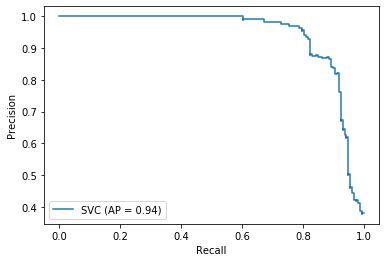

In [12]:
plot_precision_recall_curve(classifier,X_train,y_train)

#### Precision-Recall Curve over testing data

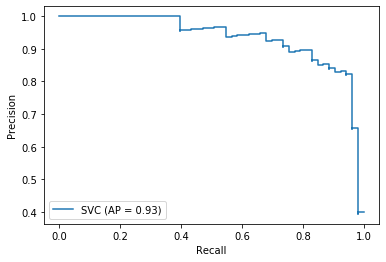

In [13]:
plot_precision_recall_curve(classifier,X_test,y_test)

### Plot ROC Curve Function
Preparing to plot ROC curve. The function plot the ROC Curve from the list containing the value of true positive and false positive rate. A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

#### Plotting ROC Curve for Training Data

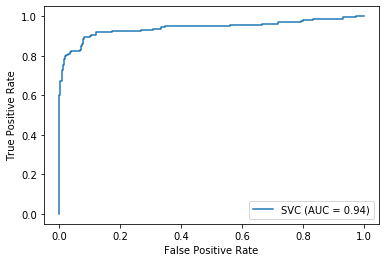

In [14]:
plot_roc_curve(classifier,X_train,y_train)

#### Plotting ROC Curve Testing Data

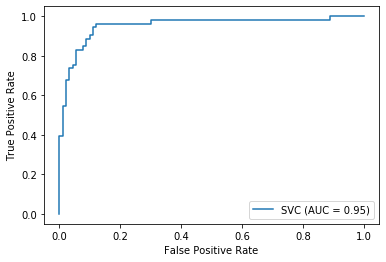

In [15]:
plot_roc_curve(classifier,X_test,y_test)

### Visualising Data

In [16]:
def visualising_data(model,x,y):
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Support Vector Machine (Training set)')
    plt.xlabel('Feature')
    plt.ylabel('Cancer Type')
    plt.legend()
    plt.show()

#### Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


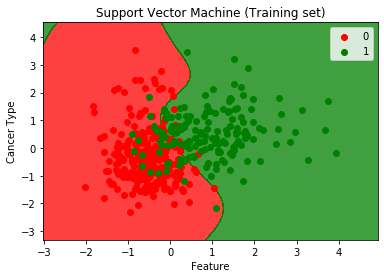

In [17]:
visualising_data(classifier,X_train,y_train)

#### Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


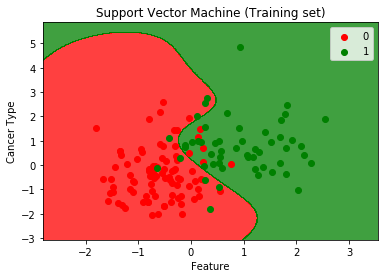

In [18]:
visualising_data(classifier,X_test,y_test)